<a href="https://colab.research.google.com/github/ANGEL201985/ANGEL201985/blob/main/Ejemplos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,1,2,3,4
PESO MODELO + SUELO,10560.40,10768.30,10954.00,10972.90
PESO DE MOLDE,6068.00,6068.00,6068.00,6068.00
PESO DE SUELO COMPACTADO,4492.40,4700.30,4886.00,4904.90
DENSIDAD HUMEDA,2.15,2.25,2.34,2.35
PESO SUELO HUMEDO + TARA,502.90,510.60,540.20,518.60
PESO SUELO SECO + TARA,490.20,487.70,506.30,477.50
PESO DE TARA,0.00,0.00,0.00,0.00
PESO DE AGUA,12.70,22.90,33.90,41.10
PESO DE SUELOS SECO,490.20,487.70,506.30,477.50
CONTENIDO DE HUMEDAD,2.59,4.70,6.70,8.61


Las raices del polinomio son: [ 7.08799889  7.05887839 -0.77914138]
El optimo contenido de humedad es: 7.087998891122816
El optimo contenido de humedad es: 7.087998891122312


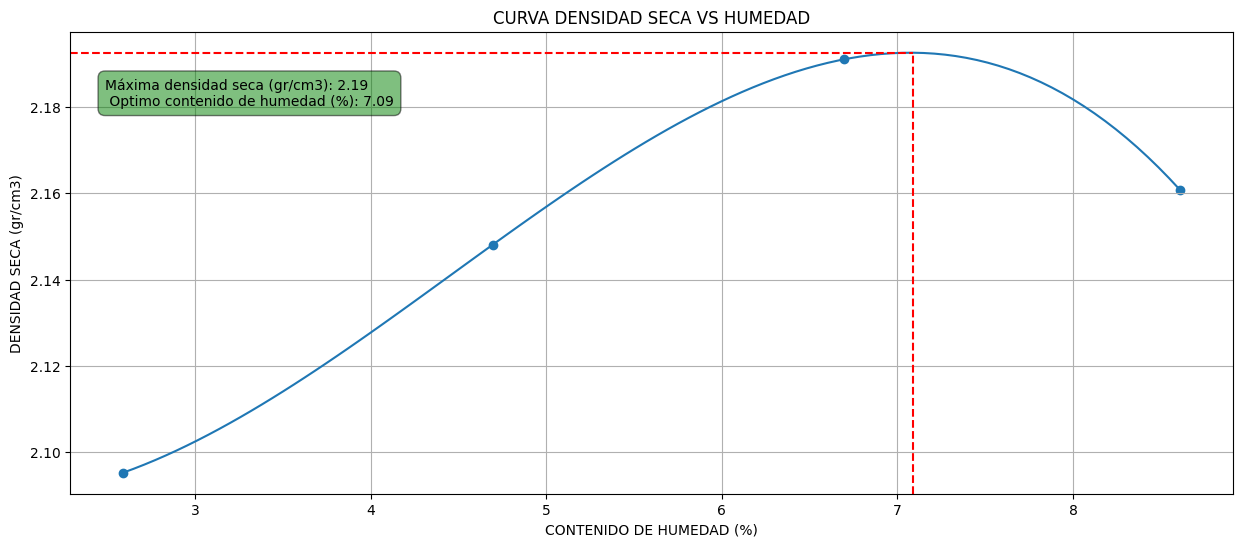

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #  Importa la submódulo pyplot de la librería Matplotlib, que se utiliza para crear gráficos.
from IPython.core.display import display #IPython.core.display es parte de la biblioteca IPython, que es una extensión interactiva de Python, La función display se utiliza para mostrar objetos en una salida enriquecida. Es más flexible que el clásico print, ya que puede mostrar no solo texto, sino también gráficos, tablas, HTML, imágenes y otros tipos de datos.
from IPython.display import HTML #IPython.display es parte de la biblioteca IPython. El método HTML permite mostrar contenido HTML directamente en el entorno de Jupyter o Colab.

peso_molde_suelo= np.array([10560.4, 10768.3, 10954.0, 10972.9])
peso_molde = 6068
peso_suelo_compactado = np.subtract(peso_molde_suelo, peso_molde)#El metodo subtract resta los valores de 2 matrices
volumen_molde = 2090
densidad_humeda = np.divide(peso_suelo_compactado, volumen_molde)#El metodo divide divide los valores de 2 matrices
peso_suelo_humedo_tara = np.array([502.9, 510.6, 540.2, 518.6])
peso_suelo_seco_tara = np.array([490.2, 487.7, 506.3, 477.5])
peso_agua = np.subtract(peso_suelo_humedo_tara, peso_suelo_seco_tara)#El metodo subtract resta los valores de 2 matrices
peso_recipiente = 0
peso_suelo_seco = np.subtract(peso_suelo_seco_tara, peso_recipiente)
contenido_humedad = np.divide(peso_agua*100, peso_suelo_seco)
densidad_Seca = np.divide(densidad_humeda, 1+ contenido_humedad/100)


#Mostrando la tabla
tabla = {'PESO MODELO + SUELO':peso_molde_suelo, 'PESO DE MOLDE': peso_molde, 'PESO DE SUELO COMPACTADO':peso_suelo_compactado, 'DENSIDAD HUMEDA':densidad_humeda,'PESO SUELO HUMEDO + TARA':peso_suelo_humedo_tara , 'PESO SUELO SECO + TARA':peso_suelo_seco_tara, 'PESO DE TARA':peso_recipiente , 'PESO DE AGUA':peso_agua, 'PESO DE SUELOS SECO':peso_suelo_seco , 'CONTENIDO DE HUMEDAD':contenido_humedad, 'DENSIDAD SECA': densidad_Seca }

tabla_pandas = pd.DataFrame(tabla, index =[1,2,3,4]).T.round(2) # Con .T, el DataFrame se transpone, colocando los nombres de las columnas como índices en filas y los valores de cada columna como nuevas columnas.

# Agregar estilos CSS, .style esto crea un objeto Styler que permite aplicar estilos al dataframe df_resultados, lambda val: Define una función anónima que toma un valor como entrada, isinstance(val, (int, float)): Verifica si el valor es un número entero (int) o decimal (float). Esta línea aplica un color de fondo verde a las celdas que contienen valores numéricos. .set_table_styles([...]) Aplica estilos CSS a diferentes elementos de la tabla (caption, th, td). 'selector': Identifica el elemento de la tabla que se estilizará: caption: Estilo del título de la tabla, th: Encabezados de las columnas, td: Celdas de los datos, 'props': Lista de propiedades CSS que se aplican
tabla_estilos = (
    tabla_pandas.style
    .map(lambda val: 'background-color: lightgreen' if isinstance(val, (int, float)) else '')  # Aplica fondo verde a valores numéricos
    .format("{:.2f}")  # Formatea los valores numéricos con dos decimales
    .set_caption("Tabla de Resultados")  # Agrega un título
    .set_table_styles(
        [
            {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold'), ('text-align', 'center')]},
            {'selector': 'th', 'props': [('background-color', '#f0f0f0'), ('color', 'black'), ('border', '1px solid gray'), ('text-align', 'center')]},
            {'selector': 'td', 'props': [('border', '1px solid gray'), ('padding', '5px'), ('text-align', 'center')]},
        ]
    )
)

# con HTML y el contenedor div centramos nuestro cuadro respecto al ancho.
display(HTML(f"""
<div style="display: flex; justify-content: center;">
    {tabla_estilos.to_html()}
</div>
"""))

# Mostrar la tabla estilizada
#display(tabla_estilos)


# Ajuste de regresión polinomial
coeficientes = np.polyfit(contenido_humedad, densidad_Seca, 3)# Realiza un ajuste polinomial de grado d3 a los datos contenido_Humedad y densidad_Seca y guarda los coeficientes en la variable coeficientes que es una matriz.

poly = np.poly1d(coeficientes)# Crea un polinomio con los coeficientes obtenidos en el paso anterior.

# Valores predichos
contenido_humedad_rango = np.linspace(min(contenido_humedad), max(contenido_humedad), 100)# Crea un array de 100 puntos equidistantes entre el mínimo y el máximo valor de contenido_Humedad.

calculo_densidad_seca = poly(contenido_humedad_rango)# Calcula los valores predichos de densidad seca utilizando el polinomio ajustado.

# Encontrar el punto máximo de la curva de regresión polinomial
densidad_seca_max = np.max(calculo_densidad_seca)# Calcula el valor máximo de densidad seca entre los valores predichos con el metodo max

coeficientes[-1] = coeficientes[-1] - densidad_seca_max
raices = np.roots(poly)
print(f'Las raices del polinomio son: {raices}')
contenido_humedad_max_0 = np.max(raices)
print(f'El optimo contenido de humedad es: {contenido_humedad_max_0}')

indice_max_densidad_seca = np.argmax(calculo_densidad_seca)# Encuentra el índice del valor máximo de densidad seca entre los valores predichos.

contenido_humedad_max = contenido_humedad_rango[indice_max_densidad_seca]# Encuentra el valor de contenido de humedad correspondiente al máximo de densidad seca.
print(f'El optimo contenido de humedad es: {contenido_humedad_max}')

# Calcular R^2
residuos = densidad_Seca - poly(contenido_humedad)
SS_res = np.sum(residuos**2)
SS_tot = np.sum((densidad_Seca - np.mean(densidad_Seca))**2)
R2 = 1 - (SS_res / SS_tot)

# Crear la ecuación del polinomio como texto
#equation_text = f"{poly}\n$R^2$ = {R2:.4f}"


# Configurar el tamaño de la figura
plt.figure(figsize=(15, 6))#Aqui definimos un ancho del grafico de 10 pulgadas x 6 pulgadas de alto

# Gráfica
plt.scatter(contenido_humedad, densidad_Seca)# Graficamos los puntos de dispersion donde Contenido de humedad estara en el eje X y maxima densidad seca estara en el eje Y. Este tipo de gráfico muestra la relación entre dos conjuntos de datos mediante la ubicación de puntos en un plano cartesiano.
plt.plot(contenido_humedad_rango, calculo_densidad_seca)# Aquí se agrega al gráfico una línea que representa la curva de regresión polinomial ajustada


# La función plt.gca() significa "Get Current Axes" (obtener los ejes actuales), Devuelve un objeto de tipo Axes que representa los ejes actuales de la figura activa en Matplotlib. Si no existe ningún eje activo, crea uno nuevo y lo devuelve. La funcion plt.gca() permite cambiar etiquetas de los ejes, ajustar los limites del grafico, modificar la apariencia de los ejes, etc.
ax = plt.gca()

#Obtenemos los valores maximos y minimos de x e y es decir devuelve los limites del eje X, Y en el grafico usando la funcion get_xlim(), get_ylim()
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()

# Para que las líneas verticales y horizontales que llegan solo hasta el punto máximo de la curva tenemos que "normalizar" se refiere a convertir los valores de datos a una escala relativa en lugar de sus valores absolutos. Cuando dibujas una línea en un gráfico utilizando plt.axvline o plt.axhline, los parámetros xmin, xmax, ymin, y ymax esperan valores en una escala de 0 a 1.
x_normalizado = (contenido_humedad_max - x_min) / (x_max - x_min)
y_normalizado = (densidad_seca_max - y_min) / (y_max - y_min)

# Para dibujar la línea vertical usando la funcion "axvline" y horizontal utilizando la funcion "axhline". axvline(x=x,ymin = y,ymax =y1): x es la posicion en el eje X donde se dibujara la linea vertical, y es el punto de inicio de la línea en el eje Y, y1 es El punto final de la línea en el eje Y la sintaxis siempres es ymin, ymax, xmin, max
#plt.axvline(x=contenido_humedad_max, ymin=0, ymax=densidad_seca_max, color='red', linestyle='--')
#plt.axhline(y=densidad_seca_max , xmin=0, xmax=contenido_humedad_max, color='red', linestyle='--')
plt.axvline(x=contenido_humedad_max, ymin=0, ymax=y_normalizado, color='red', linestyle='--')
plt.axhline(y=densidad_seca_max , xmin=0, xmax=x_normalizado, color='red', linestyle='--')

plt.xlabel('CONTENIDO DE HUMEDAD (%)')# Agregamos etiqueta en el eje X
plt.ylabel('DENSIDAD SECA (gr/cm3)')# Agregamos etiqueta en el eje Y
plt.title('CURVA DENSIDAD SECA VS HUMEDAD')# Agregamos un titulo a nuestro grafico

# El sistema transAxes permite posicionar elementos gráficos en el espacio relativo al área de los ejes. El "transform=plt.gca().transAxes" especifica que las coordenadas (0.03, 0.90), están en el sistema de coordenadas de los ejes, no en el sistema de coordenadas de los datos del gráfico. plt.gca(): Esta función devuelve el objeto Axes actual, el cual es la región del gráfico donde se plotean los datos. transAxes: Es una transformación asociada al sistema de coordenadas del eje. En este sistema: El origen (0, 0) está en la esquina inferior izquierda del área del gráfico (dentro de los ejes). El punto (1, 1) está en la esquina superior derecha.
plt.text(0.03, 0.90, f'Máxima densidad seca (gr/cm3): {densidad_seca_max:.2f}\n Optimo contenido de humedad (%): {contenido_humedad_max:.2f}', horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes, bbox=dict(facecolor='green', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.5'))

plt.grid(True)
plt.show()














